In [1]:
is_colab = 'google.colab' in str(get_ipython())
if is_colab:
    !pip install neuron
    !git clone https://github.com/davidfague/Neural-Modeling.git -b cleanup
    %cd Neural-Modeling/scripts
    !pip install neuron_reduce
    !pip install ipympl

In [2]:
import sys
sys.path.append("../")
sys.path.append("../Modules/")

from Modules.simulation import Simulation
from Modules.cell_builder import SkeletonCell, CellBuilder
from Modules.constants import HayParameters

import os
from neuron import h

from logger import Logger # type: ignore

import numpy as np

--No graphics will be displayed.


In [3]:
# initialize simulation object and parameters
sim = Simulation(SkeletonCell.Hay)
parameters = HayParameters(sim_name = 'test', h_tstop= 1000, all_synapses_off=True) # NOTE: synapses will crash the simulation since they are not mapped and will remain on deleted sections

In [4]:
try:
    os.system("rm -r x86_64/")
except:
    pass

rm: cannot remove 'x86_64/': No such file or directory


In [5]:
%cd ../scripts

/home/drfrbc/Neural-Modeling/scripts


In [6]:
os.system(f"nrnivmodl {sim.cell_type.value['modfiles']} > /dev/null 2>&1")

h.load_file('stdrun.hoc')
h.nrn_load_dll('./x86_64/.libs/libnrnmech.so')

1.0

In [7]:
%matplotlib widget

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interactive, fixed, FloatSlider

# Setup a global reference for figure and axes
fig, ax = None, None

def plot_segments(seg_data, elevation=0, azimuth=-100, radius_scale=1.0, deleted_indices=[]):
    global fig, ax
    if fig is None or ax is None:
        plt.close('all')  # Close any existing plots
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    else:
        ax.cla()  # Clear the existing axes

    for i, seg in enumerate(seg_data):
        x_points = [seg.coords['p0_0'].iloc[0], seg.coords['pc_0'].iloc[0], seg.coords['p1_0'].iloc[0]]
        y_points = [seg.coords['p0_1'].iloc[0], seg.coords['pc_1'].iloc[0], seg.coords['p1_1'].iloc[0]]
        z_points = [seg.coords['p0_2'].iloc[0], seg.coords['pc_2'].iloc[0], seg.coords['p1_2'].iloc[0]]

        radius = seg.coords['r'].iloc[0] * radius_scale
        color = 'red' if i in deleted_indices else 'black'
        radius = radius*0.1 if i in deleted_indices else radius # can adjust multiplier to increase red radius
        ax.plot(x_points, z_points, y_points, linewidth=radius, color=color)

    ax.view_init(elev=elevation, azim=azimuth)
    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')
    
class Interactive3DPlot:
    def __init__(self):
        # Initialize the plot without showing it
        self.fig, self.ax = plt.subplots(subplot_kw={'projection': '3d'})

    def plot_segments(self, seg_data, elevation=20, azimuth=-100, radius_scale=1.0, deleted_indices=[]):
        self.ax.cla()  # Clear the existing axes

        for i, seg in enumerate(seg_data):
            x_points = [seg.coords['p0_0'].iloc[0], seg.coords['pc_0'].iloc[0], seg.coords['p1_0'].iloc[0]]
            y_points = [seg.coords['p0_1'].iloc[0], seg.coords['pc_1'].iloc[0], seg.coords['p1_1'].iloc[0]]
            z_points = [seg.coords['p0_2'].iloc[0], seg.coords['pc_2'].iloc[0], seg.coords['p1_2'].iloc[0]]

            radius = seg.coords['r'].iloc[0] * radius_scale
            color = 'red' if i in deleted_indices else 'black'
            radius = radius*10 if i in deleted_indices else radius
            self.ax.plot(x_points, z_points, y_points, linewidth=radius, color=color)

        self.ax.view_init(elev=elevation, azim=azimuth)
        self.ax.set_xlabel('X')
        self.ax.set_ylabel('Z')
        self.ax.set_zlabel('Y')

In [8]:
from Modules.morph_reduction_utils import reduce_tree

In [9]:
# Ensure %matplotlib widget is enabled for interactive matplotlib in Jupyter
%matplotlib widget

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interactive, FloatSlider, fixed
from IPython.display import display


class Interactive3DPlot:
    def __init__(self):
        # Initialize the plot without showing it
        self.fig, self.ax = plt.subplots(subplot_kw={'projection': '3d'})

    def plot_segments(self, seg_data, elevation=20, azimuth=-100, radius_scale=1.0, deleted_indices=[]):
        self.ax.cla()  # Clear the existing axes

        for i, seg in enumerate(seg_data):
            x_points = [seg.coords['p0_0'].iloc[0], seg.coords['pc_0'].iloc[0], seg.coords['p1_0'].iloc[0]]
            y_points = [seg.coords['p0_1'].iloc[0], seg.coords['pc_1'].iloc[0], seg.coords['p1_1'].iloc[0]]
            z_points = [seg.coords['p0_2'].iloc[0], seg.coords['pc_2'].iloc[0], seg.coords['p1_2'].iloc[0]]

            radius = seg.coords['r'].iloc[0] * radius_scale
            color = 'red' if i in deleted_indices else 'black'
            radius = radius*10 if i in deleted_indices else radius
            self.ax.plot(x_points, z_points, y_points, linewidth=radius, color=color)

        self.ax.view_init(elev=elevation, azim=azimuth)
        self.ax.set_xlabel('X')
        self.ax.set_ylabel('Z')
        self.ax.set_zlabel('Y')

In [10]:
from Modules.morph_reduction_utils import get_reduced_cell

In [11]:
os.mkdir(sim.path)
parameters.path = os.path.join(sim.path, parameters.sim_name)

In [12]:
os.mkdir(parameters.path)

In [13]:
logger = Logger(None)
cell_builder = CellBuilder(sim.cell_type, parameters, logger)

In [14]:
# plot1 = Interactive3DPlot()

# # Setup interactive widgets for each plot
# interactive_plot1 = interactive(plot1.plot_segments, 
#                                 seg_data=fixed(original_seg_data),
#                                 elevation=(-90, 90, 1),
#                                 azimuth=(-180, 180, 1),
#                                 radius_scale=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0),
#                                 deleted_indices=fixed(deleted_seg_indices))# deleted_indices=fixed(oblique_roots_with_children_seg_indices))


# display(interactive_plot1)

# plot1 = Interactive3DPlot()

# # Setup interactive widgets for each plot
# interactive_plot1 = interactive(plot1.plot_segments, 
#                                 seg_data=fixed(original_seg_data),
#                                 elevation=(-90, 90, 1),
#                                 azimuth=(-180, 180, 1),
#                                 radius_scale=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0),
#                                 deleted_indices=fixed(all_oblique_segments))# deleted_indices=fixed(oblique_roots_with_children_seg_indices))


# display(interactive_plot1)

In [15]:
complex_cell, _ = cell_builder.build_cell()
reduced_cell_tufts, original_seg_data, all_deleted_seg_indices = get_reduced_cell(cell_builder, reduce_tufts = True, reduce_obliques = False)
reduced_cell_obliques, original_seg_data, all_deleted_seg_indices = get_reduced_cell(cell_builder, reduce_tufts = False, reduce_obliques = True)
reduced_cell_basals, original_seg_data, all_deleted_seg_indices = get_reduced_cell(cell_builder, reduce_basals = True)
# reduced_cell_tufts_basals, original_seg_data, all_deleted_seg_indices = get_reduced_cell(cell_builder, reduce_tufts = True, reduce_basals = True, reduce_obliques = False)
reduced_cell_tufts_basals_obliques, original_seg_data, all_deleted_seg_indices = get_reduced_cell(cell_builder, reduce_tufts = True, reduce_basals = True, reduce_obliques = True)
# reduced_cell_tufts_obliques, original_seg_data, all_deleted_seg_indices = get_reduced_cell(cell_builder, reduce_tufts = True, reduce_basals = False, reduce_obliques = True)
# reduced_cell_basals_obliques, original_seg_data, all_deleted_seg_indices = get_reduced_cell(cell_builder, reduce_tufts = False, reduce_basals = True, reduce_obliques = True)
# reduce_cell_all_apic, _, _ = get_reduced_cell(cell_builder, reduce_apic = True, reduce_basals = True)
cells = {
    'Complex':complex_cell,
    'Reduced Tufts':reduced_cell_tufts,
    'Reduced Basals':reduced_cell_basals,
    'Reduced Obliques':reduced_cell_obliques,
    # 'Reduced Tufts and Basals':reduced_cell_tufts_basals,
    # 'Reduced Tufts and Obliques':reduced_cell_tufts_obliques,
    # 'Reduced Basals and Obliques':reduced_cell_basals_obliques,
    'Reduced Tufts, Basals, Obliques': reduced_cell_tufts_basals_obliques
    # 'Reduced Basals, entire Apical': reduce_cell_all_apic
}

(2024-05-21 16:20:14.199854)-[PID: 522566]–[INFO]: Building SkeletonCell.Hay.
(2024-05-21 16:20:16.984403)-[PID: 522566]–[INFO]: Finished creating a CellModel object.
(2024-05-21 16:20:16.984518)-[PID: 522566]–[INFO]: Finish building in 2.785093069076538
(2024-05-21 16:20:16.986323)-[PID: 522566]–[INFO]: Building SkeletonCell.Hay.
(2024-05-21 16:20:19.708137)-[PID: 522566]–[INFO]: Finished creating a CellModel object.
(2024-05-21 16:20:19.708221)-[PID: 522566]–[INFO]: Finish building in 2.7224557399749756
(2024-05-21 16:20:21.581103)-[PID: 522566]–[INFO]: Reducing Tufts
(2024-05-21 16:20:24.295717)-[PID: 522566]–[INFO]: Building SkeletonCell.Hay.
(2024-05-21 16:20:27.002278)-[PID: 522566]–[INFO]: Finished creating a CellModel object.
(2024-05-21 16:20:27.002362)-[PID: 522566]–[INFO]: Finish building in 2.706897258758545
(2024-05-21 16:20:28.974612)-[PID: 522566]–[INFO]: Reducing Obliques
(2024-05-21 16:20:37.323638)-[PID: 522566]–[INFO]: Building SkeletonCell.Hay.
(2024-05-21 16:20:40.

There is no segment to segment copy, it means that some segments in thereduced model did not receive channels from the original cell.Trying to compensate by copying channels from neighboring segments


(2024-05-21 16:20:50.986379)-[PID: 522566]–[INFO]: Building SkeletonCell.Hay.
(2024-05-21 16:20:53.678341)-[PID: 522566]–[INFO]: Finished creating a CellModel object.
(2024-05-21 16:20:53.678423)-[PID: 522566]–[INFO]: Finish building in 2.6923089027404785
(2024-05-21 16:20:55.616110)-[PID: 522566]–[INFO]: Reducing Tufts
(2024-05-21 16:20:55.616185)-[PID: 522566]–[INFO]: Reducing Basals
(2024-05-21 16:20:55.616205)-[PID: 522566]–[INFO]: Reducing Obliques


There is no segment to segment copy, it means that some segments in thereduced model did not receive channels from the original cell.Trying to compensate by copying channels from neighboring segments


Show Reduced Cell

In [16]:
# reduced_cell_all, _ = cell_builder.build_cell()

In [17]:
# # build cell with reduced tufts and basals

# # reduced_cell_all, _ = cell_builder.build_cell()

# adjacency_matrix_all = reduced_cell_all.compute_directed_adjacency_matrix()

# from Modules.cell_model import find_nexus_seg
# all_segments_all, seg_data_all = reduced_cell_all.get_segments(['all'])

# nexus_seg_index_all = find_nexus_seg(reduced_cell_all, adjacency_matrix_all)
# nexus_seg_all = all_segments_all[nexus_seg_index_all]
# soma_basal_children = [sec for sec in reduced_cell_all.soma[0].children() if sec in reduced_cell_all.dend]
# root_sections_to_reduce = nexus_seg_all.sec.children() + soma_basal_children
# print(f"root_sections_to_reduce: {root_sections_to_reduce}")

# all_deleted_seg_indices_all = []
# new_sections_all = []
# for root_section in root_sections_to_reduce:
#     deleted_seg_indices, new_section = reduce_tree(reduced_cell_all, root_section, all_segments_all, seg_data, adjacency_matrix)
#     all_deleted_seg_indices_all.extend(deleted_seg_indices)
#     new_sections_all.append(new_section)
    
# new_segments_all = [seg for new_section in new_sections_all for seg in list(new_section)]
# all_segments_after_reduction_all, new_seg_data_all = reduced_cell_all.get_segments(['all'])

In [18]:
# new_seg_indices = []
# for seg in new_segments: # new_sections is a list of segments as of writing this
#     new_seg_indices.append(all_segments_after_reduction.index(seg))

# # now for all reduced    
# new_seg_indices_all = []
# for seg in new_segments_all: # new_sections is a list of segments as of writing this
#     new_seg_indices_all.append(all_segments_after_reduction_all.index(seg))

In [19]:
# Ensure %matplotlib widget is enabled for interactive matplotlib in Jupyter
%matplotlib widget

# plot1 = Interactive3DPlot()
# plot2 = Interactive3DPlot()
# plot3 = Interactive3DPlot()

# # Setup interactive widgets for each plot
# interactive_plot1 = interactive(plot1.plot_segments, 
#                                 seg_data=fixed(seg_data),
#                                 elevation=(-90, 90, 1),
#                                 azimuth=(-180, 180, 1),
#                                 radius_scale=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0),
#                                 deleted_indices=fixed(all_deleted_seg_indices))

# interactive_plot2 = interactive(plot2.plot_segments, 
#                                 seg_data=fixed(new_seg_data),
#                                 elevation=(-90, 90, 1),
#                                 azimuth=(-180, 180, 1),
#                                 radius_scale=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0),
#                                 deleted_indices=fixed(new_seg_indices))

# interactive_plot3 = interactive(plot3.plot_segments, 
#                                 seg_data=fixed(new_seg_data_all),
#                                 elevation=(-90, 90, 1),
#                                 azimuth=(-180, 180, 1),
#                                 radius_scale=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0),
#                                 deleted_indices=fixed(new_seg_indices_all))

# display(interactive_plot1)
# display(interactive_plot2)
# display(interactive_plot3)

In [20]:
# parameters

In [21]:
# os.mkdir(sim.path)
# parameters.path = os.path.join(sim.path, parameters.sim_name)

In [22]:
# parameters.path

In [23]:
parameters.record_ecp = True

In [24]:
# example simulation
# sim.set_all_recorders(reduced_cell_tufts, parameters)
# sim.simulate(reduced_cell_tufts, parameters)
# import pickle
# with open(os.path.join(parameters.path, "parameters.pickle"), "wb") as file:
#     pickle.dump(parameters, file)
import Modules.analysis as analysis
# soma_spikes = analysis.DataReader.read_data(parameters.path, "soma_spikes")
# v = analysis.DataReader.read_data(parameters.path, "v")
# v[0]

In [25]:
# !python3 plot_lfp.py -d SkeletonCell.Hay-07-05-2024-17-20-41/test

Some Notes: 
Compare detailed and reduced
Try allen database cell
1. We adapted neuron_reduce for more user-control.
2. Currently not Mapping synapses, but it will be easy to add.
3. We could convert single-cylinders into an equivalent set of nbranches.

COMPARISONS

In [26]:
# os.mkdir(f"{parameters.path}")

In [27]:
# complex_cell, _ = cell_builder.build_cell()

In [28]:
# sim.set_all_recorders(complex_cell, parameters)
# sim.set_all_recorders(reduced_cell_all, parameters)

for cell_name, cell in cells.items():
    sim.set_all_recorders(cell, parameters)

(2024-05-21 16:21:08.830400)-[PID: 522566]–[WARNING]: Recording ECP adds the extracellular channel to all segments after computing electrotonic distance.                                      This channel is therefore not accounted for in impedence calculation, but it might affect the simulation.
(2024-05-21 16:21:09.833733)-[PID: 522566]–[WARNING]: Recording ECP adds the extracellular channel to all segments after computing electrotonic distance.                                      This channel is therefore not accounted for in impedence calculation, but it might affect the simulation.
(2024-05-21 16:21:10.598005)-[PID: 522566]–[WARNING]: Recording ECP adds the extracellular channel to all segments after computing electrotonic distance.                                      This channel is therefore not accounted for in impedence calculation, but it might affect the simulation.
(2024-05-21 16:21:11.433692)-[PID: 522566]–[WARNING]: Recording ECP adds the extracellular channel to all seg

In [29]:
# initialize current injections
for cell_name, cell in cells.items():
    cell.set_injection(amp = 0, dur = 1950, delay = 50, target='soma')

In [30]:
# import shutil
# import os
# import pickle
# import numpy as np
# import matplotlib.pyplot as plt
# import csv
# from Modules.cell_model import find_nexus_seg


# # Adjust the parameters and initialize the cell structure here
# root_path = parameters.path
# FI_paths = []
# parameters.h_tstop = 2000
# parameters.h_i_duration = 1950
# parameters.h_i_delay = 50
# amps = np.arange(-2, 2.1, 0.5)

# # Prepare subplots: one for the somatic injection, another for the nexus injection
# fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# # Create a CSV file to store the results
# csv_file_path = "FI_Curve_Data.csv"
# with open(csv_file_path, mode='w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(["Cell Name", "Use Nexus", "Amplitude (nA)", "Firing Rate (Hz)"])

#     for use_nexus, ax in zip([False, True], axes):
#         for cell_name, cell in cells.items():
#             firing_rates = []

#             if use_nexus:  # move current injection to the nexus
#                 nexus_segment = find_nexus_seg(cell, cell.compute_directed_adjacency_matrix())
#                 segments, _ = cell.get_segments(['all'])
#                 cell.current_injection.loc(segments[nexus_segment])

#             for amp in amps:
#                 parameters.path = root_path + f"/{cell_name}_{use_nexus}_FI_{amp:.1f}"
#                 # os.mkdir(parameters.path)
#                 # with open(os.path.join(parameters.path, "parameters.pickle"), "wb") as file:
#                 #     pickle.dump(parameters, file)
#                 FI_paths.append(parameters.path)
#                 cell.current_injection.amp = amp

#                 # Perform simulation
#                 print(f"simulating {cell_name} {amp:.1f}")
#                 sim.simulate(cell, parameters)

#                 # Read the voltage and spike data
#                 v = analysis.DataReader.read_data(parameters.path, "v", parameters=parameters)
#                 soma_spikes = analysis.DataReader.read_data(parameters.path, "soma_spikes", parameters=parameters)

#                 # Calculate the firing rate
#                 firing_rate = len(soma_spikes[0]) / (parameters.h_tstop / 1000)
#                 firing_rates.append(firing_rate)
                
#                 # Write the results to the CSV file
#                 writer.writerow([cell_name, use_nexus, amp, firing_rate])

#             label = cell_name
#             ax.plot(amps, firing_rates, label=label)

#         ax.set_title("Somatic F/I with Nexus Current Injection" if use_nexus else "Somatic F/I with Somatic Current Injection")
#         ax.set_xlabel('Amplitude (nA)')
#         ax.set_ylabel('Firing Rate (Hz)')
#         ax.set_xlim(0,2)
#         ax.legend()

# # Display the plots
# plt.tight_layout()

# # Save the figure to the current directory
# plt.savefig("FI_Curve_Plot.png")  # You can specify other formats like 'pdf' by changing the file extension

# plt.show()

# # Clean up temporary directories
# for FI_path in FI_paths:
#     shutil.rmtree(FI_path)

# # Reset for future simulations
# parameters.path = root_path
# for cell_name,cell in cells.items():
#     cell.current_injection.amp = 0

(2024-05-21 16:21:12.474966)-[PID: 522566]–[INFO]: Starting simulation.
(2024-05-21 16:21:17.109070)-[PID: 522566]–[INFO]: Saving data at step: 2500
(2024-05-21 16:21:17.135325)-[PID: 522566]–[INFO]: Finished writing data
(2024-05-21 16:21:17.136427)-[PID: 522566]–[INFO]: Finished clearing recorders
(2024-05-21 16:21:21.870963)-[PID: 522566]–[INFO]: Saving data at step: 5000
(2024-05-21 16:21:21.897061)-[PID: 522566]–[INFO]: Finished writing data
(2024-05-21 16:21:21.898171)-[PID: 522566]–[INFO]: Finished clearing recorders
(2024-05-21 16:21:26.571777)-[PID: 522566]–[INFO]: Saving data at step: 7500
(2024-05-21 16:21:26.593651)-[PID: 522566]–[INFO]: Finished writing data
(2024-05-21 16:21:26.594713)-[PID: 522566]–[INFO]: Finished clearing recorders
(2024-05-21 16:21:31.336231)-[PID: 522566]–[INFO]: Saving data at step: 10000
(2024-05-21 16:21:31.359743)-[PID: 522566]–[INFO]: Finished writing data
(2024-05-21 16:21:31.360840)-[PID: 522566]–[INFO]: Finished clearing recorders
(2024-05-21

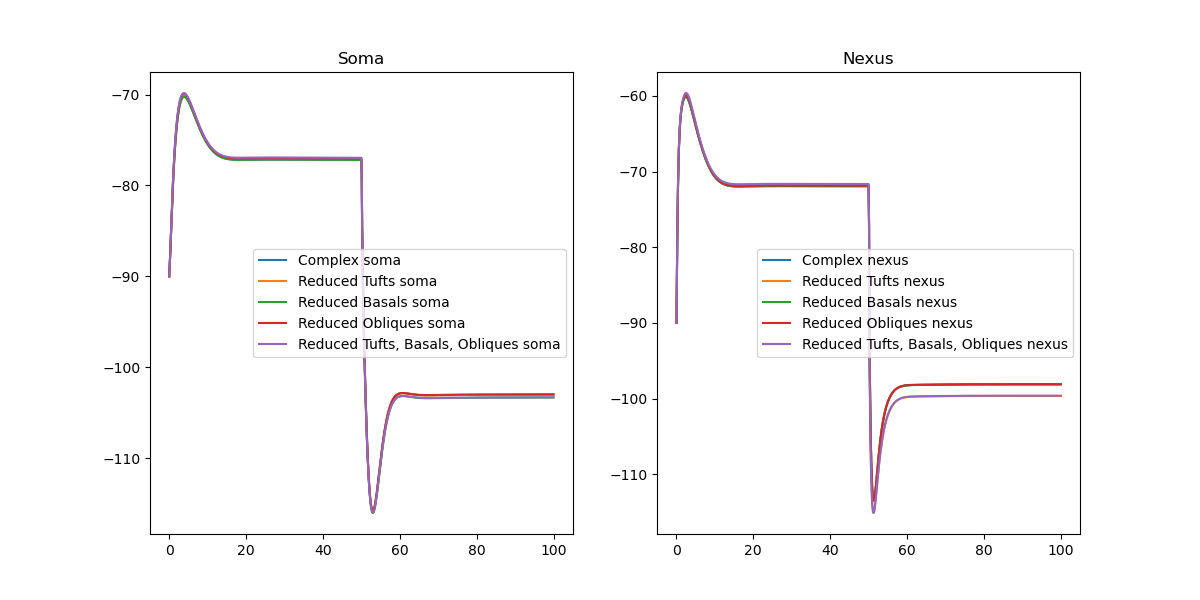

In [31]:
# input resistance & membrane time constant
from scripts.compare_input_resistance import calc_input_resistance, calc_time_constant
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
import pickle
import numpy as np
import matplotlib.pyplot as plt
import csv
from Modules.cell_model import find_nexus_seg

root_path = parameters.path
FI_paths = []
parameters.h_tstop = 1000
parameters.h_i_duration = 500
parameters.h_i_delay = 500
parameters.save_every_ms = 250
amps = [-1]

# Creating a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # figsize is adjustable based on your preference

# Initialize a list to hold the DataFrame data
data = []

for use_nexus in [False, True]:
    for cell_name, cell in cells.items():
        for amp in amps:
            dir_suffix = 'nexus' if use_nexus else 'soma'
            parameters.path = f"{root_path}/{cell_name}_Rin_{dir_suffix}_{amp:.1f}"
            os.makedirs(parameters.path, exist_ok=True)
            
            with open(os.path.join(parameters.path, "parameters.pickle"), "wb") as file:
                pickle.dump(parameters, file)
            FI_paths.append(parameters.path)
            parameters.h_i_amplitude = amp
            cell.current_injection.amp = amp
            cell.current_injection.dur = parameters.h_i_duration
            cell.current_injection.delay = parameters.h_i_delay
            if use_nexus:
                nexus_segment = find_nexus_seg(cell, cell.compute_directed_adjacency_matrix())
                segments, _ = cell.get_segments(['all'])
                cell.current_injection.loc(segments[nexus_segment])
            
            sim.simulate(cell, parameters)
            print(cell_name, parameters.path)
            
            v = analysis.DataReader.read_data(parameters.path, "v", parameters=parameters)
            id_to_use = nexus_segment if use_nexus else 0
            
            # Select the appropriate axis based on whether the nexus is used
            ax = ax2 if use_nexus else ax1
            ax.plot(np.arange(0, len(v[id_to_use])) * parameters.h_dt, v[id_to_use], label=f"{cell_name} {'nexus' if use_nexus else 'soma'}")
            
            soma_spikes = analysis.DataReader.read_data(parameters.path, "soma_spikes")
            Rin = calc_input_resistance(parameters.path, id_to_use)
            tau = calc_time_constant(parameters.path, id_to_use)

            # Append data to the list
            if use_nexus:
                # For nexus data, find the corresponding cell in the list and update
                for entry in data:
                    if entry['Cell Name'] == cell_name:
                        entry['Nexus Input Resistance'] = Rin
                        entry['Nexus Time Constant'] = tau
            else:
                # For somatic data, create a new entry
                data.append({
                    'Cell Name': cell_name,
                    'Somatic Input Resistance': Rin,
                    'Somatic Time Constant': tau,
                    'Nexus Input Resistance': None,
                    'Nexus Time Constant': None
                })


            # # Save simulation data to CSV
            # sim_data = pd.DataFrame({'Time': np.arange(0, len(v[id_to_use])) * parameters.h_dt, 'Voltage': v[id_to_use]})
            # sim_data.to_csv(os.path.join(parameters.path, "simulation_data.csv"), index=False)

# Create DataFrame from collected data
df = pd.DataFrame(data)
print(df)

# Add legends and titles
ax1.set_title('Soma')
ax1.legend()
ax2.set_title('Nexus')
ax2.legend()

plt.show()

# Cleanup directories
for FI_path in FI_paths:
    shutil.rmtree(FI_path)
    
# Reset for future simulations
for cell_name, cell in cells.items():
    cell.current_injection.amp = 0
parameters.save_every_ms = 1000
parameters.path = root_path


In [32]:
df

,Cell Name,Somatic Input Resistance,Somatic Time Constant,Nexus Input Resistance,Nexus Time Constant
0,Complex,2.587780,7,2.619089,3
1,Reduced Tufts,2.594766,7,2.792127,2
2,Reduced Basals,2.620765,6,2.619508,3
3,Reduced Obliques,2.600698,7,2.624966,3
4,"Reduced Tufts, Basals, Obliques",2.641012,6,2.798845,2


In [33]:
# # won't need this on the next run since I fixed parameters.h_i_amplitude
# df['Nexus Input Resistance'] = df['Nexus Input Resistance']*10
# df['Somatic Input Resistance'] = df['Somatic Input Resistance']*10

In [34]:
def round_dataframe(df):
    """
    Rounds every column of numeric values in the dataframe to 3 decimal places.

    Parameters:
    df (pd.DataFrame): The DataFrame to be rounded.

    Returns:
    pd.DataFrame: A new DataFrame with numeric values rounded to 3 decimal places.
    """
    return df.applymap(lambda x: round(x, 3) if isinstance(x, (int, float)) else x)

df = round_dataframe(df)


/tmp/ipykernel_522566/2132278554.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(lambda x: round(x, 3) if isinstance(x, (int, float)) else x)


In [41]:
df

,Cell Name,Somatic Input Resistance,Somatic Time Constant,Nexus Input Resistance,Nexus Time Constant
0,Complex,25.878,7,26.191,3
1,Reduced Tufts,25.948,7,27.921,2
2,Reduced Basals,26.208,6,26.195,3
3,Reduced Obliques,26.007,7,26.250,3
4,"Reduced Tufts, Basals, Obliques",26.410,6,27.988,2


: 

In [40]:
df.to_csv('../notebooks/PassiveProperties.csv')

In [36]:
# reset for future simulations
for cell_name, cell in cells.items():
    cell.current_injection.amp = 0
# complex_cell.current_injection.amp = 0
parameters.save_every_ms = 1000
parameters.path = root_path

In [37]:
# olbique_root_seg_indices = get_divergent_children_of_branching_segments(adjacency_matrix, start=263, end=nexus_seg_index)
# oblique_root_sections = [all_segments[seg_index].sec for seg_index in olbique_root_seg_indices]
# all_segments.index(all_segments[0].sec.children()[1](0.0001))
# oblique_root_sections
# oblique_root_section_children = [sec for oblique_root_sec in oblique_root_sections for sec in oblique_root_sec.children()]

In [38]:
# def get_oblique_root_sections(cell):
#     adjacency_matrix = cell.compute_adjacency_matrix()
#     all_segments, seg_data = cell.get_segments(['All'])
#     nexus_seg_index = find_nexus_seg(cell, adjacency_matrix)
#     apic_trunk_root_seg_index = all_segments.index(all_segments[0].sec.children()[1](0.0001))
#     oblique_root_seg_indices = get_divergent_children_of_branching_segments(adjacency_matrix, start=apic_trunk_root_seg_index, end=nexus_seg_index)
#     oblique_root_sections = [all_segments[seg_index].sec for seg_index in olbique_root_seg_indices]
#     return oblique_root_sections

In [39]:
# synapses